In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report , brier_score_loss, log_loss
from sklearn.calibration import calibration_curve

In [2]:
# Load the dataset
file_path = "weather_classification_data.csv"  # Change if necessary
df = pd.read_csv(file_path)

In [3]:

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4     

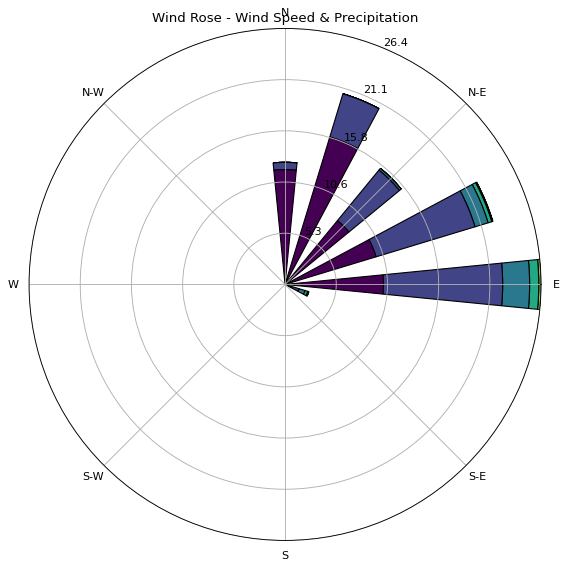

In [29]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df['Precipitation (%)'], df['Wind Speed'], normed=True, opening=0.5, edgecolor='black')
ax.set_title("Wind Rose - Wind Speed & Precipitation")
plt.show()

In [5]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [6]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

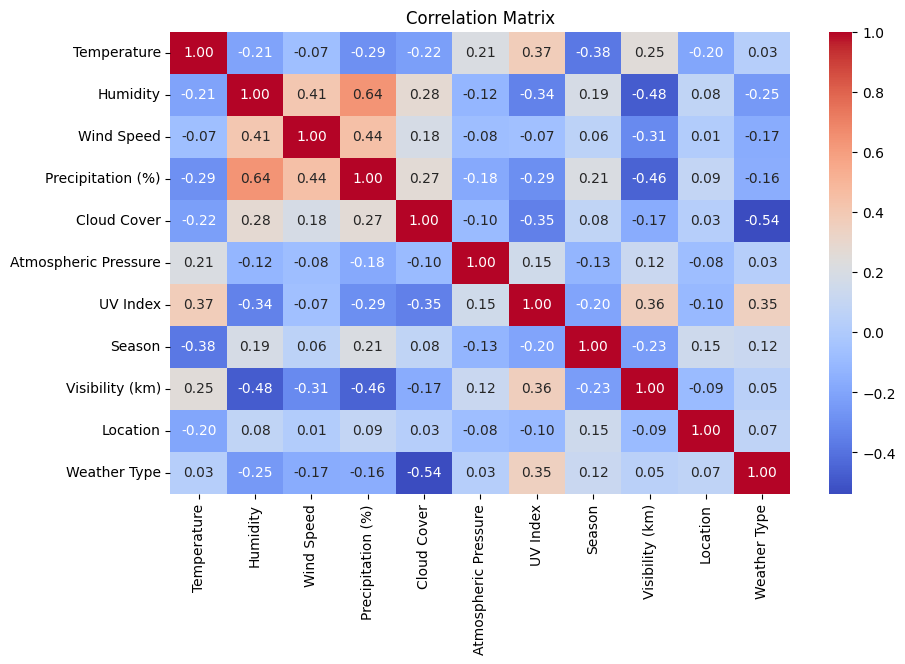

In [7]:
# Visualizing correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

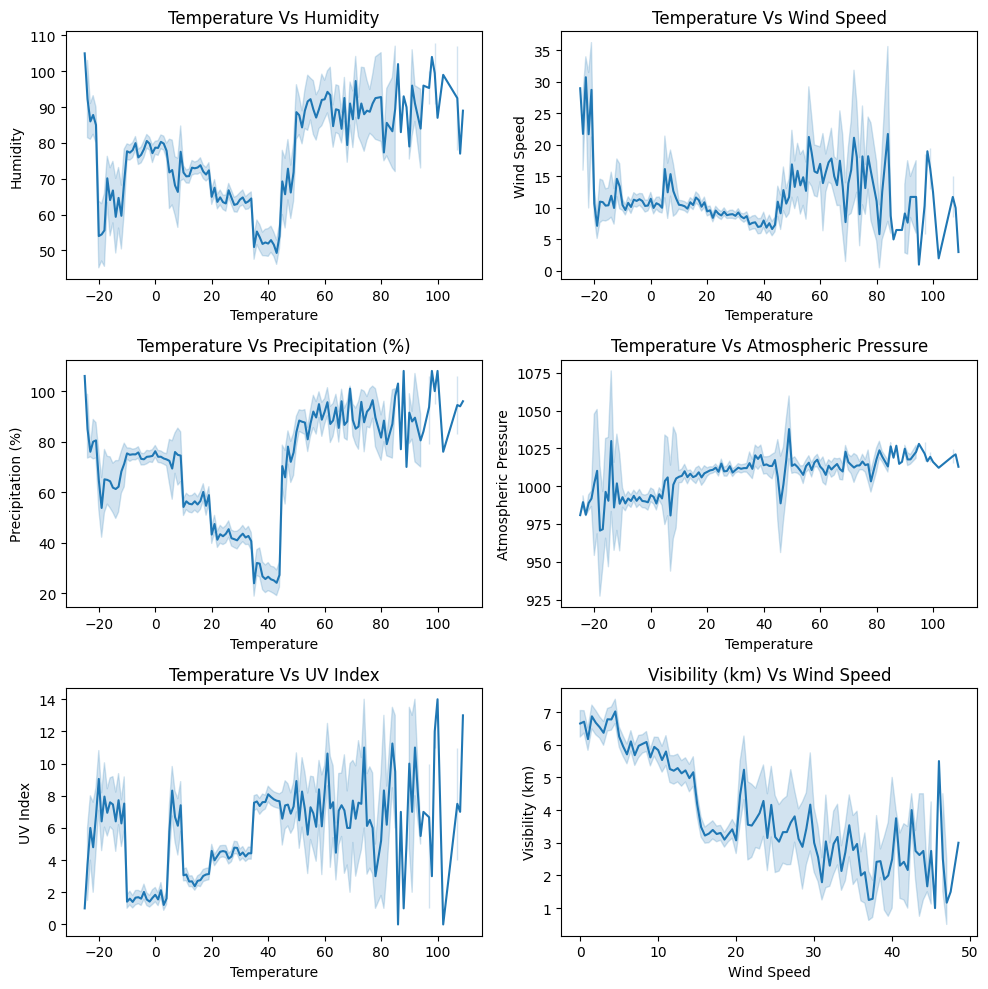

In [52]:
# Line Plots
plt.figure(figsize =(10,10))
plt.subplot(3,2,1)
sns.lineplot(x = df['Temperature'], y = df['Humidity'])
plt.title("Temperature Vs Humidity")
plt.subplot(3,2,2)
sns.lineplot(x = df['Temperature'], y = df['Wind Speed'])
plt.title("Temperature Vs Wind Speed")
plt.subplot(3,2,3)
sns.lineplot(x = df['Temperature'], y = df['Precipitation (%)'])
plt.title("Temperature Vs Precipitation (%)")
plt.subplot(3,2,4)
sns.lineplot(x = df['Temperature'], y = df['Atmospheric Pressure'])
plt.title("Temperature Vs Atmospheric Pressure")
plt.subplot(3,2,5)
sns.lineplot(x = df['Temperature'], y = df['UV Index'])
plt.title("Temperature Vs UV Index")
plt.subplot(3,2,6)
sns.lineplot(x = df['Wind Speed'], y = df['Visibility (km)'])
plt.title("Visibility (km) Vs Wind Speed")
plt.tight_layout()
plt.show()


In [9]:
# Defining features and target
X = df.drop(columns=['Weather Type'])  # Change 'weather_label' if your dataset has a different target column
y = df['Weather Type']

In [10]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Step 4: Model Training & Evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [57]:
model_names = []
accuracies = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8545
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       660
           1       0.84      0.86      0.85       660
           2       0.90      0.91      0.91       660
           3       0.87      0.81      0.84       660

    accuracy                           0.85      2640
   macro avg       0.86      0.85      0.85      2640
weighted avg       0.86      0.85      0.85      2640

Random Forest Accuracy: 0.9155
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       660
           1       0.90      0.91      0.91       660
           2       0.96      0.91      0.93       660
           3       0.95      0.92      0.93       660

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Decision Tree Accuracy: 0.9061
              precision    reca

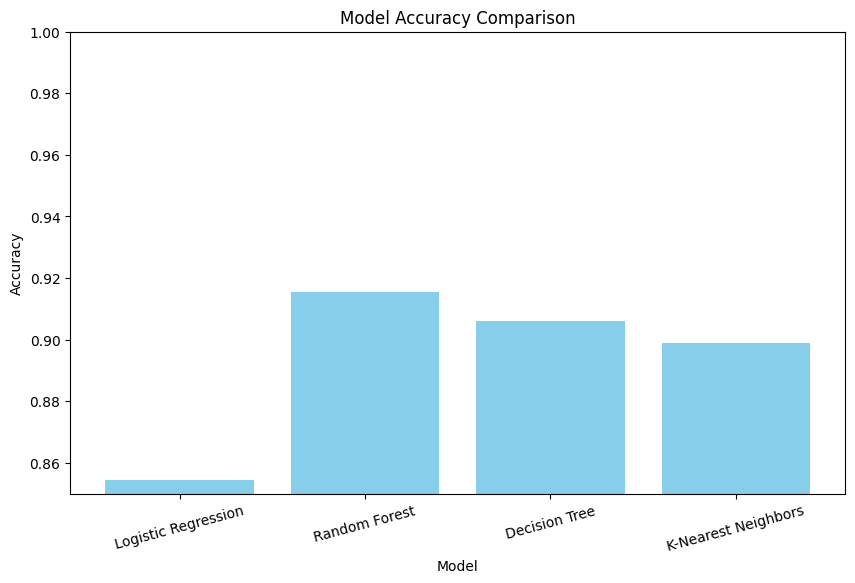

In [58]:
# Accuracy Comparison Plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.85, 1.0])
plt.xticks(rotation=15)
plt.show()

In [12]:
# Applying Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Making predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)


In [75]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nRandom Forest Model Accuracy: {:.2f}%".format(accuracy * 100))



Random Forest Model Accuracy: 91.55%


In [76]:
# Log Loss
log_loss_score = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_score:.4f}")

Log Loss: 0.1791


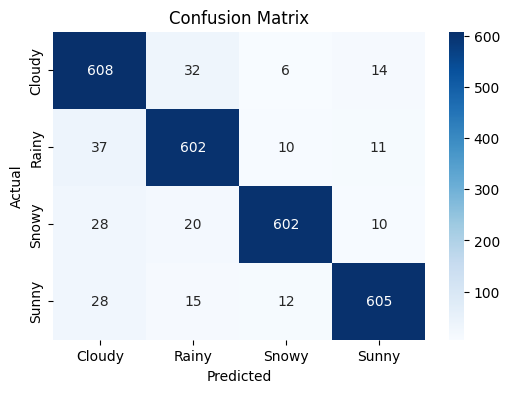

In [77]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['Weather Type'].classes_, yticklabels=label_encoders['Weather Type'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()